In [1]:
import os
import sys
sys.path.append("../library")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
import hashlib

from dataProcess import *
from defaultPlot import *
from stringFormat import *

In [2]:
param = utils.set_default()


In [3]:
net_prefix = utils.network_prefix(param)
DATA_DIR = os.path.join('data', net_prefix)
FIG_DIR = os.path.join('fig', net_prefix)
totPacket_dir = os.path.join(DATA_DIR, 'totPacket')
history_dir = os.path.join(DATA_DIR, "history")
packet_list = {1.00: list(range(1, 151)),
               0.95: list(range(1, 151)),
               0.85: list(range(1, 151)),
               0.50: list(range(1, 151))}
history = {}


## Write pickle

In [4]:
for strategy in [0.5, 0.85, 0.95, 1.0]:
    #* Ready to merge
    param.strategy = strategy
    tot = pd.DataFrame(list(range(0, param.max_iteration)))

    #* Read for every packet list
    for packet in packet_list[strategy]:
        param.packet = packet
        file_path = os.path.join(totPacket_dir, utils.dynamics_prefix(param) + ".csv")
        df = pd.read_csv(file_path, header=None)
        df.columns = [packet]
        tot = pd.concat([tot, df], axis=1)
    tot.set_index([0], inplace=True)

    #* Save the total history
    tot.to_pickle(os.path.join(history_dir, utils.dynamics_prefix_wo_packet(param)))
    history[strategy] = tot

KeyboardInterrupt: 

## Read pickle

In [4]:
for strategy in [0.5, 0.85, 0.95, 1.00]:
    param.strategy = strategy
    history[strategy] = pd.read_pickle(os.path.join(history_dir, utils.dynamics_prefix_wo_packet(param)))

# Plot

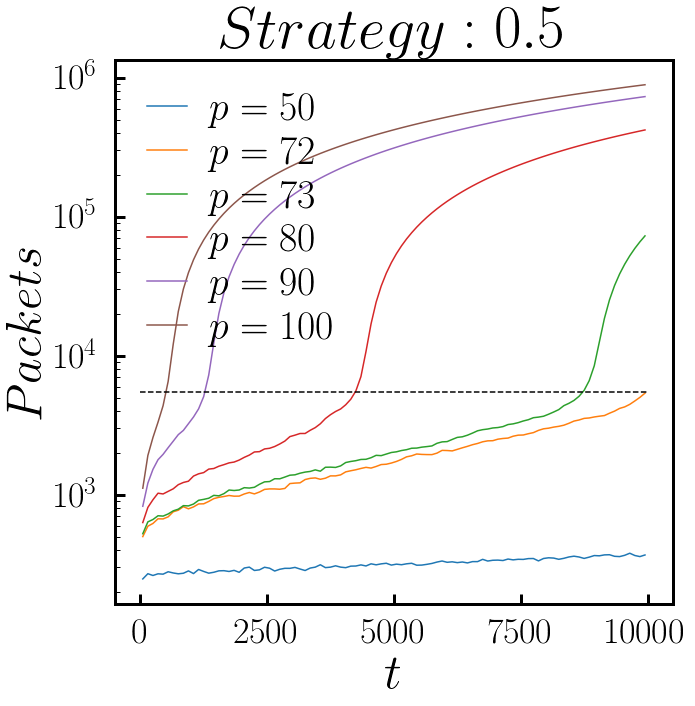

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

strategy = 0.5
for packet in [50, 72, 73, 80, 90, 100]:
    x = np.arange(param.max_iteration)
    y = history[strategy][packet].values
    x,y = avgLinBin(x,y, min_val=x[0], max_val=x[-1], delta=100)
    ax.plot(x,y, label=latex_string('p={}'.format(packet)))
    # ax.plot(history[strategy][packet], label=latex_string("p={}".format(packet)))

y = 5.5e3
ax.plot([0, param.max_iteration], [y,y], 'k--')

ax.set_xlabel(latex_string("t"))
ax.set_ylabel(latex_string("Packets"))
ax.legend(loc='upper left', fontsize=20)
ax.set_title(latex_string("Strategy: {}".format(strategy)))
ax.set_yscale('log')

# fig.savefig(os.path.join(FIG_DIR, "history_S{:.2f}.pdf".format(strategy)))
fig.show()


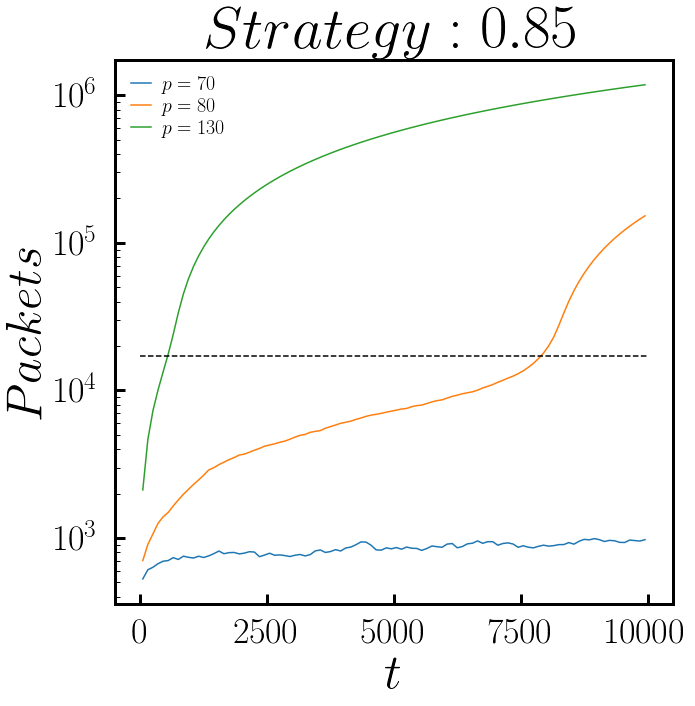

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

strategy = 0.85
for packet in [70, 80, 130]:
    x = np.arange(param.max_iteration)
    y = history[strategy][packet].values
    x,y = avgLinBin(x,y, min_val=x[0], max_val=x[-1], delta=100)
    ax.plot(x,y, label=latex_string('p={}'.format(packet)))
    # ax.plot(history[strategy][packet], label=latex_string("p={}".format(packet)))

y = 1.7e4
ax.plot([0, param.max_iteration], [y,y], 'k--')

ax.set_xlabel(latex_string("t"))
ax.set_ylabel(latex_string("Packets"))
ax.legend(loc='best', fontsize=20)
ax.set_title(latex_string("Strategy: {}".format(strategy)))
ax.set_yscale('log')

# fig.savefig(os.path.join(FIG_DIR, "history_S{:.2f}.pdf".format(strategy)))
fig.show()


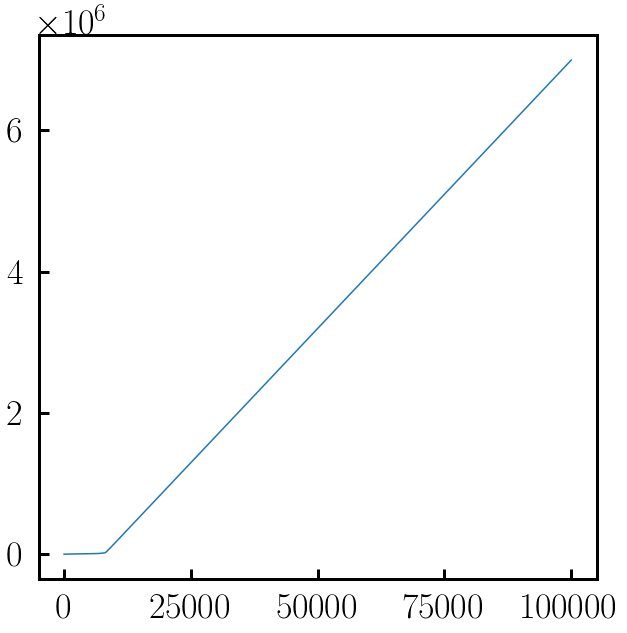

In [13]:
param.max_iteration = 100000
param.strategy = 0.85
param.packet = 80
file_path = os.path.join(totPacket_dir, utils.dynamics_prefix(param) + '.csv')
df = pd.read_csv(file_path, header=None)

# plt.yscale('log')
plt.plot(df)


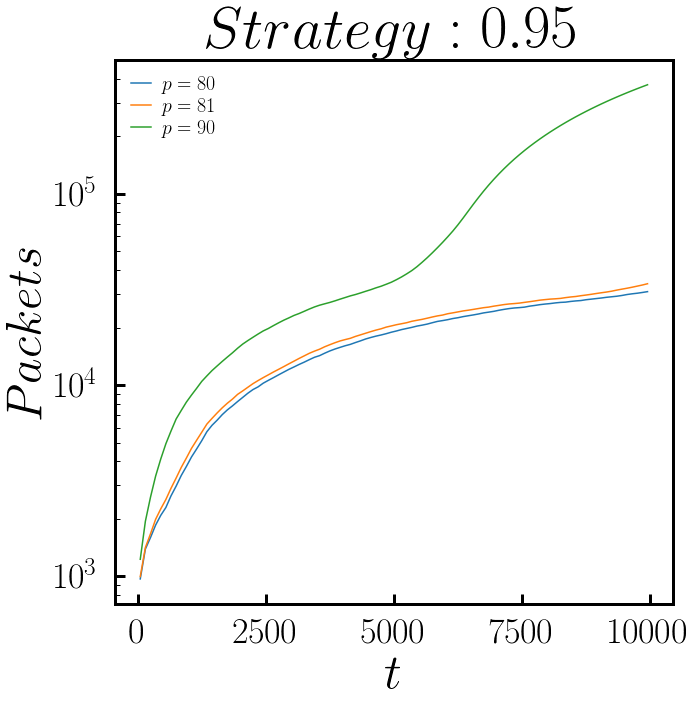

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

strategy = 0.95
for packet in [80, 81, 90]:
    x = np.arange(param.max_iteration)
    y = history[strategy][packet].values
    x,y = avgLinBin(x,y, min_val=x[0], max_val=x[-1], delta=100)
    ax.plot(x,y, label=latex_string('p={}'.format(packet)))
    # ax.plot(history[strategy][packet], label=latex_string("p={}".format(packet)))


ax.set_xlabel(latex_string("t"))
ax.set_ylabel(latex_string("Packets"))
ax.legend(loc='best', fontsize=20)
ax.set_title(latex_string("Strategy: {}".format(strategy)))
ax.set_yscale('log')

# fig.savefig(os.path.join(FIG_DIR, "history_S{:.2f}.pdf".format(strategy)))
fig.show()


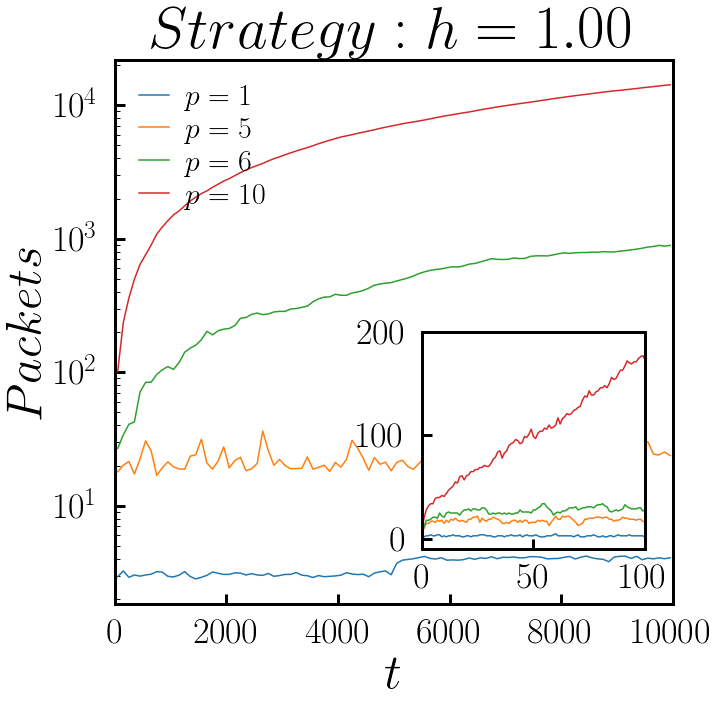

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

strategy = 1.00
for packet in [1, 5, 6, 10]:
    x = np.arange(param.max_iteration)
    y = history[strategy][packet].values
    x,y = avgLinBin(x,y, min_val=x[0], max_val=x[-1], delta=100)
    ax.plot(x,y, label=latex_string('p={}'.format(packet)))



ax1 = ax.inset_axes([0.55, 0.1, 0.4, 0.4])

for packet in [1, 5, 6, 10]:
    x = np.arange(param.max_iteration)
    y = history[strategy][packet].values
    # x,y = avgLinBin(x,y, min_val=x[0], max_val=x[-1], delta=100)
    ax1.plot(x,y, label=latex_string('p={}'.format(packet)))



ax.set_xlabel(latex_string("t"))
ax.set_ylabel(latex_string("Packets"))
ax.legend(loc='upper left', fontsize=30)
ax.set_title(latex_string("Strategy: h={:.2f}".format(strategy)))
ax.set_yscale('log')
ax.set_xlim(0, param.max_iteration)
ax1.set_ylim(-10, 200)
ax1.set_xlim(0, 100)

fig.savefig(os.path.join(FIG_DIR, "history_S{:.2f}.pdf".format(strategy)))
fig.show()
